Link data: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Khi chạy code mô hình phân loại, nên restart lại kernel và chỉ chạy những phần cần thiết đến mô hình để cho kết quả đúng nhất

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

SEED = 42

In [2]:
def concat_df(train_data, test_data):
    # Returns a concatenated df of training and test set
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    # Return divided dfs of training and test set
    train_df = all_data.loc[:890]  
    test_df = all_data.loc[891:]
    
    return train_df, test_df


df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set' 

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
print(df_train.info())
df_train.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S


In [4]:
print(df_test.info())
df_test.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
281,1173,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.775,NaN,S
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.750,NaN,Q
91,983,3,"Pedersen, Mr. Olaf",male,NaN,0,0,345498,7.775,NaN,S


In [3]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    
for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




handle with missing values in `Age`

In [4]:
# Select only the numeric columns
numeric_df = df_all.select_dtypes(include=[np.number])

# Compute the correlation matrix on the numeric DataFrame
df_all_corr = numeric_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

# Rename the columns for clarity
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)

# Display the rows where 'Feature 1' is 'Age'
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
0,Age,Age,1.000000
9,Age,Pclass,0.408106
18,Age,SibSp,0.243699
21,Age,Fare,0.178740
26,Age,Parch,0.150917
30,Age,Survived,0.077221
41,Age,PassengerId,0.028814


In [5]:
# Convert 'Age' column to numeric, forcing non-numeric values to NaN
df_all['Age'] = pd.to_numeric(df_all['Age'], errors='coerce')

# Calculate median age for each group of 'Sex' and 'Pclass'
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass'])['Age'].median()

# Print the median ages for each group
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

print('Median age of all passengers: {}'.format(df_all['Age'].median()))

# Function to fill missing values with the median age of the group
def fill_age(row):
    if pd.isna(row['Age']):
        return age_by_pclass_sex[row['Sex']][row['Pclass']]
    else:
        return row['Age']

# Apply the function to fill missing values
df_all['Age'] = df_all.apply(fill_age, axis=1)


Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


handle `Embarked`

In [6]:
df_all[df_all['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [7]:
df_all['Embarked'] = df_all['Embarked'].fillna('C')

handle `Fare`

In [8]:
df_all[df_all['Fare'].isnull()]


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [9]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

handle `Cabin`

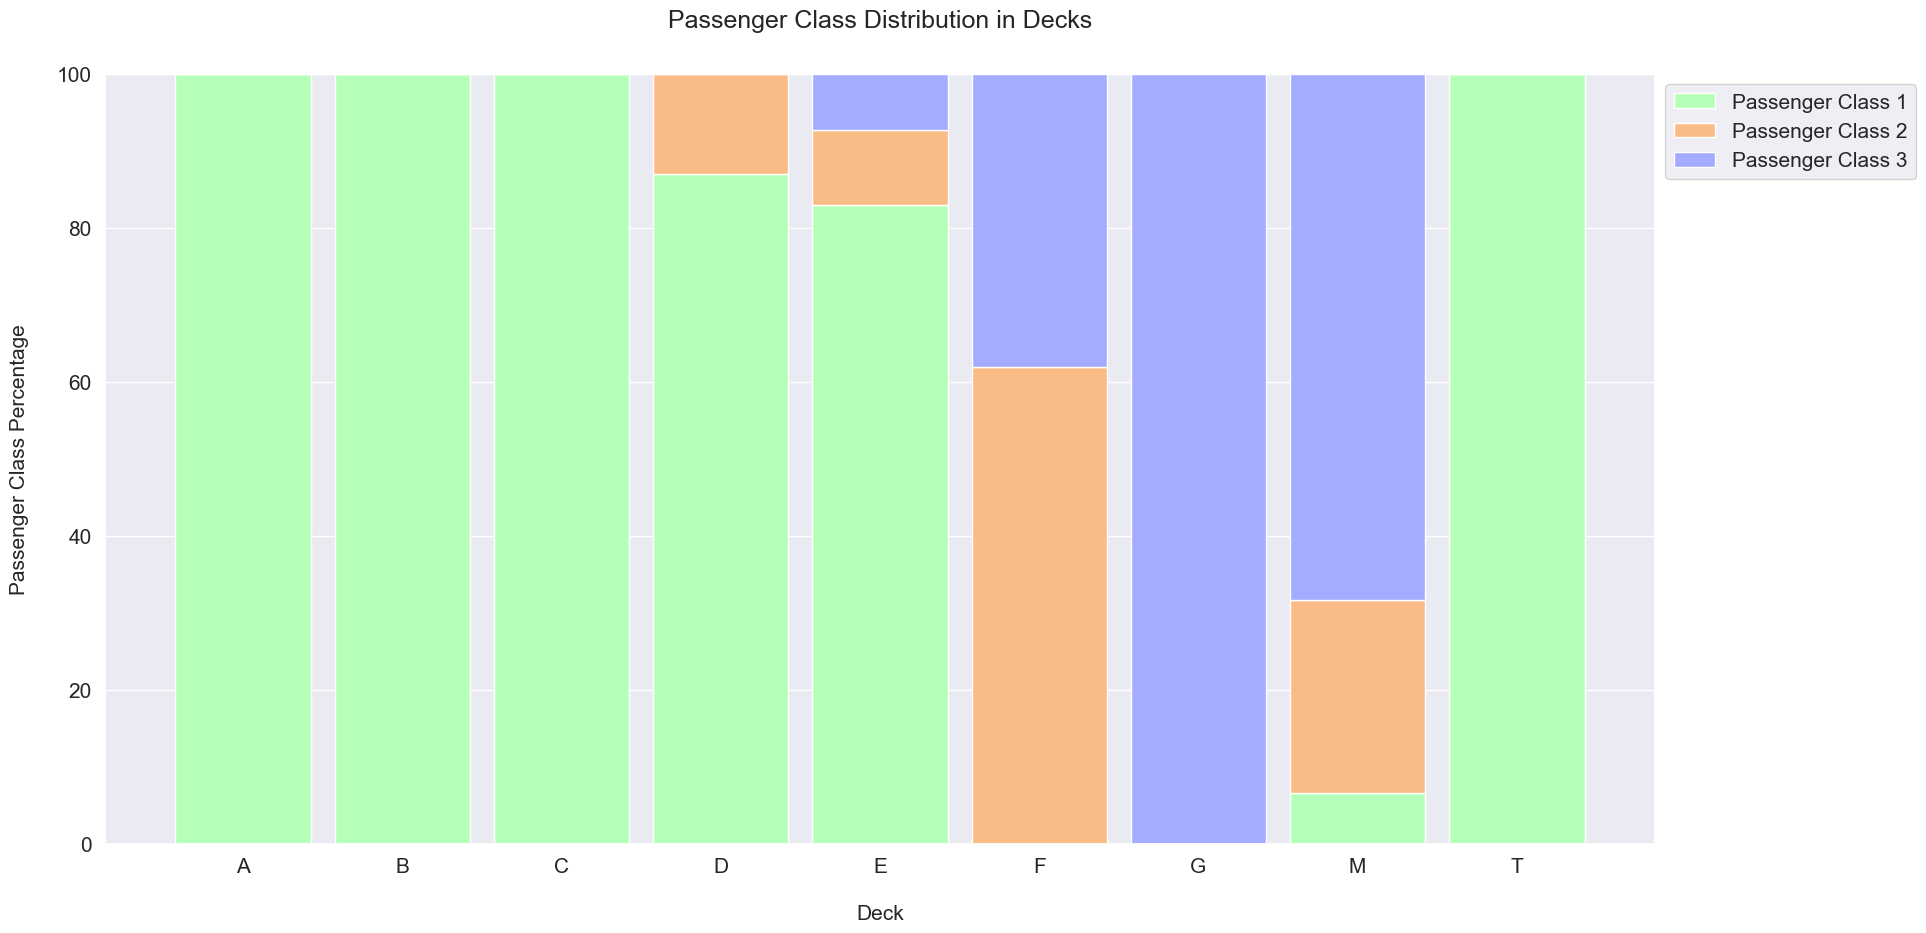

In [10]:
# Creating Deck column from the first letter of the Cabin column (M stands for Missing)
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = (
    df_all.groupby(['Deck', 'Pclass']).count()  # Group by 'Deck' and 'Pclass', then count occurrences
    .drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket'])  # Drop unnecessary columns
    .rename(columns={'Name': 'Count'})  # Rename 'Name' column to 'Count'
    .transpose()  # Transpose the DataFrame
)


def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.get_level_values(0)
  
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

In [11]:
# Passenger in the T deck is changed to A
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

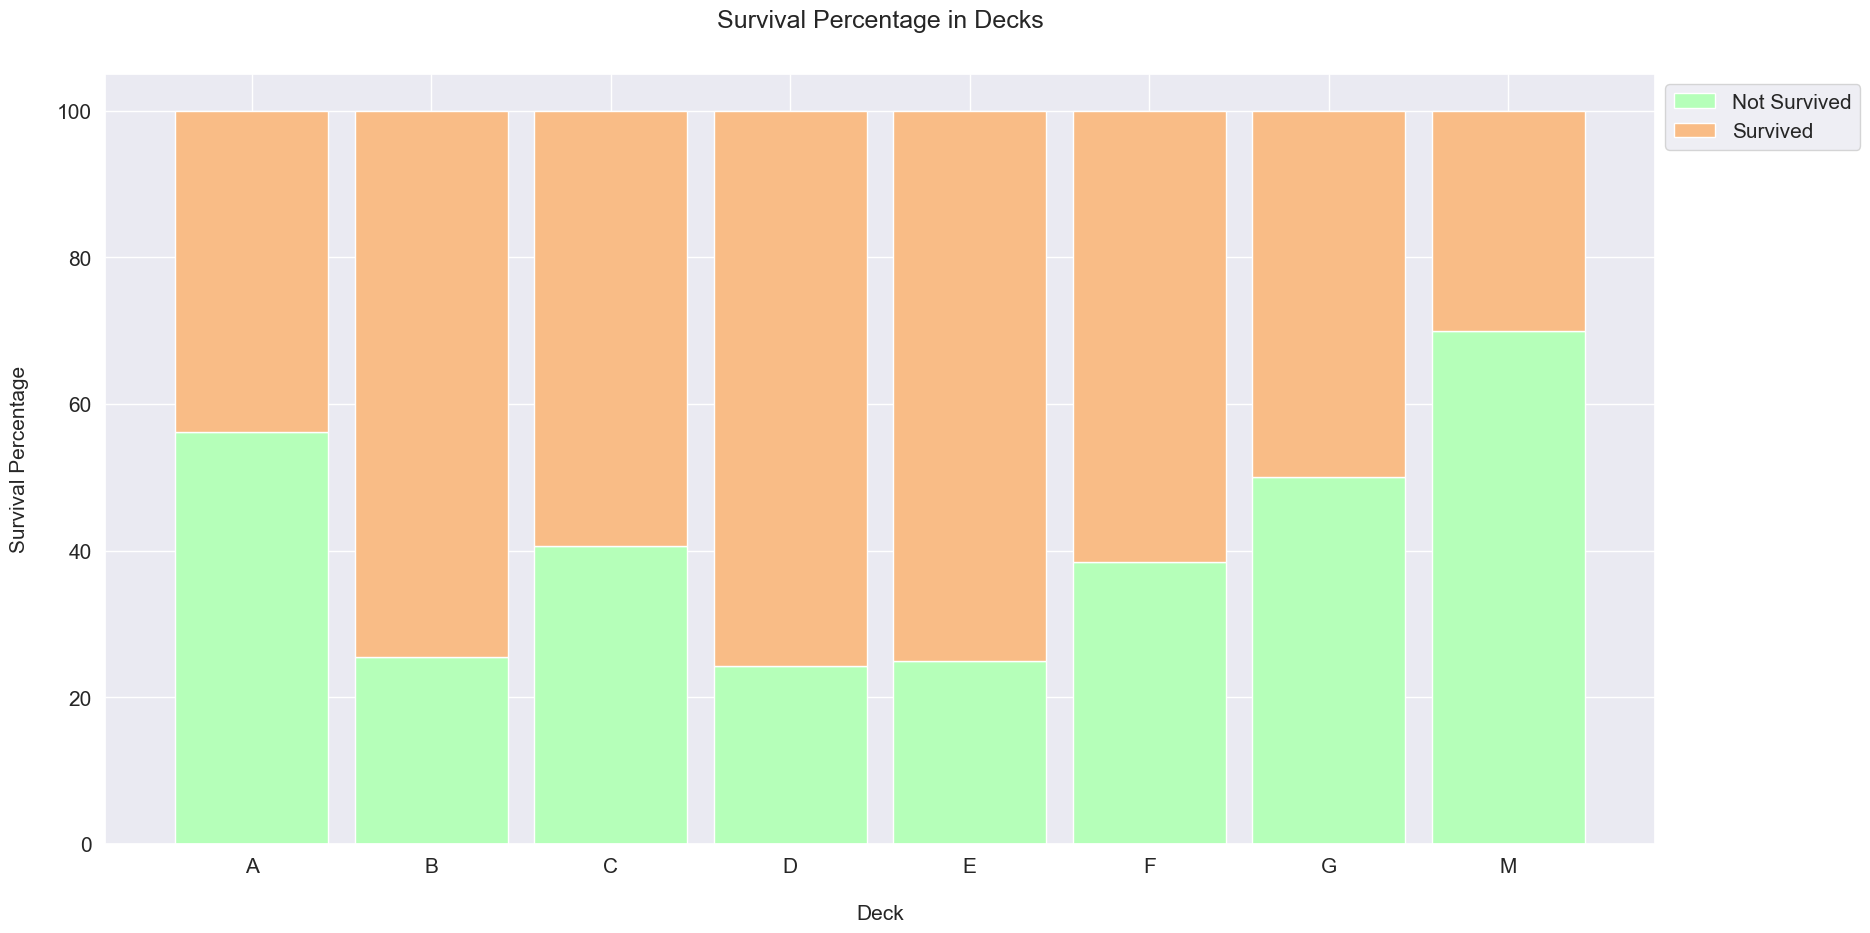

In [12]:
df_all_decks_survived = (
    df_all.groupby(['Deck', 'Survived']).count()
    .drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket'])
    .rename(columns={'Name':'Count'})
    .transpose()
)

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

In [13]:
df_all['Deck'] = df_all['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_all['Deck'] = df_all['Deck'].replace(['D', 'E'], 'DE')
df_all['Deck'] = df_all['Deck'].replace(['F', 'G'], 'FG')

df_all['Deck'].value_counts()

Deck
M      1014
ABC     182
DE       87
FG       26
Name: count, dtype: int64

In [14]:
# Dropping the Cabin feature
df_all.drop(['Cabin'], inplace=True, axis=1)

df_train, df_test = divide_df(df_all)
dfs = [df_train, df_test]

for df in dfs:
    display_missing(df)

Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 0
Ticket column missing values: 0
Deck column missing values: 0


Age column missing values: 0
Embarked column missing values: 0
Fare column missing values: 0
Name column missing values: 0
Parch column missing values: 0
PassengerId column missing values: 0
Pclass column missing values: 0
Sex column missing values: 0
SibSp column missing values: 0
Survived column missing values: 418
Ticket column missing values: 0
Deck column missing values: 0




PCA

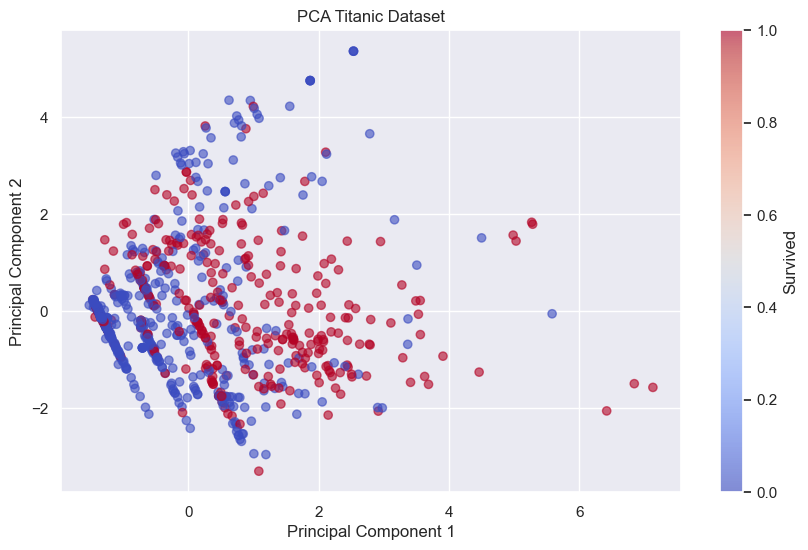

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Deck', 'Embarked'], axis=1, inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop('Survived', axis=1))

# Áp dụng PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Biểu diễn dữ liệu trong không gian giảm chiều
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df_train['Survived'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Titanic Dataset')
plt.colorbar(label='Survived')
plt.show()


CLUSTER


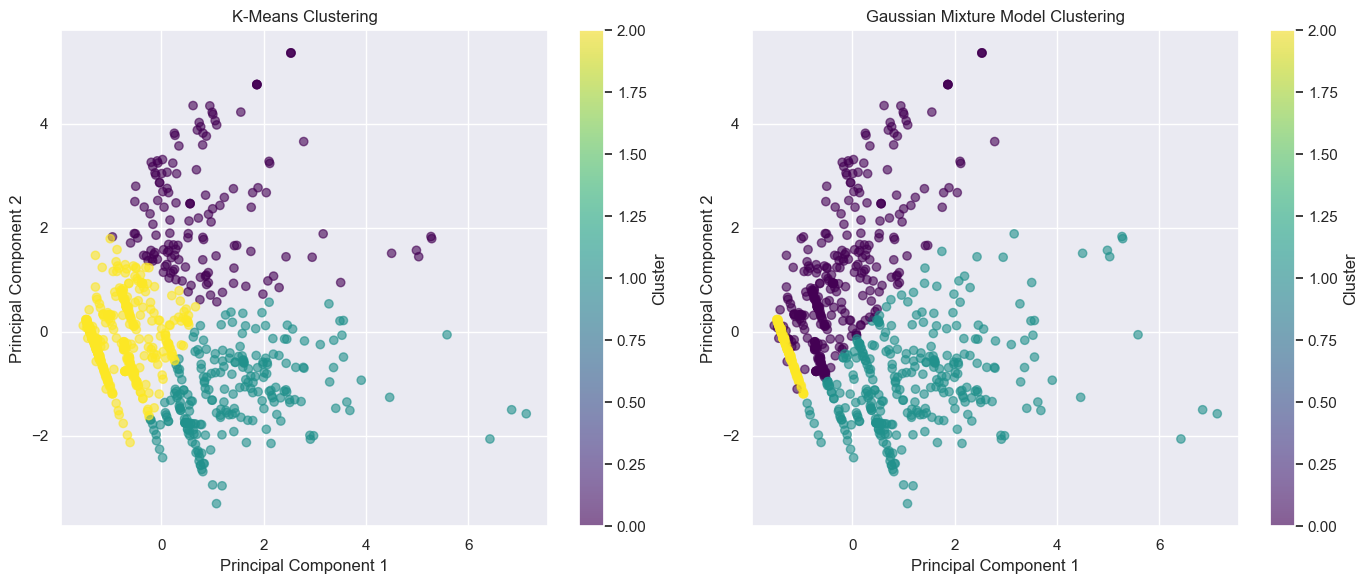

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop('Survived', axis=1))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# khởi tạo k-mean
kmeans = KMeans(n_clusters=3, random_state=SEED)
kmeans_clusters = kmeans.fit_predict(principal_components)

# khởi tạo gmm
gmm = GaussianMixture(n_components=3, random_state=SEED)
gmm_clusters = gmm.fit_predict(principal_components)

plt.figure(figsize=(14, 6))
# K-Means
plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

# GMM
plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=gmm_clusters, cmap='viridis', alpha=0.6)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

Đánh giá phân cụm

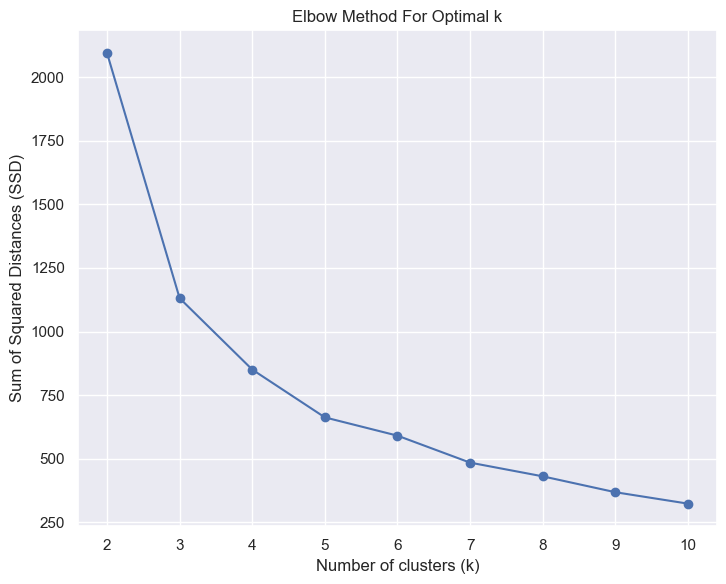

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ssd = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=SEED)
    kmeans.fit(principal_components)
    ssd.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(principal_components, kmeans.labels_))

# Elbow Method
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(K, ssd, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.title('Elbow Method For Optimal k')

# Silhouette Score
# plt.subplot(1, 2, 2)
# plt.plot(K, silhouette_scores, 'bo-')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Score For Optimal k')

plt.tight_layout()
plt.show()


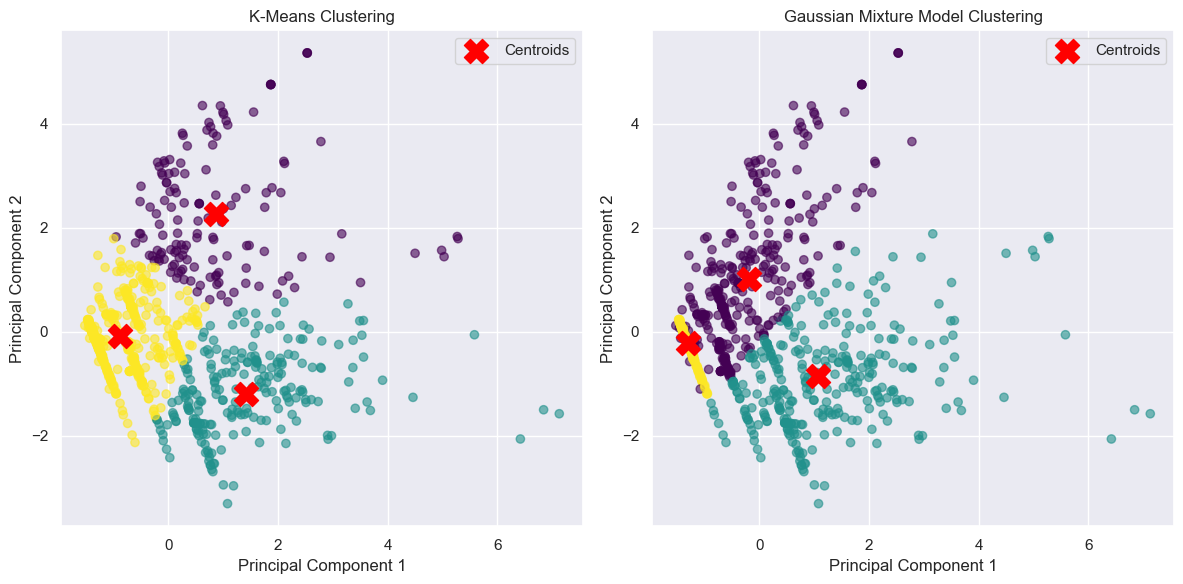

In [20]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# K-Means 
kmeans = KMeans(n_clusters=3, random_state=SEED)
kmeans_clusters = kmeans.fit_predict(principal_components)
kmeans_centroids = kmeans.cluster_centers_

# Gaussian Mixture Model 
gmm = GaussianMixture(n_components=3, random_state=SEED)
gmm_clusters = gmm.fit_predict(principal_components)
gmm_centroids = gmm.means_

# Plotting K-Means Clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.legend()

# Plotting Gaussian Mixture Model Clustering
plt.subplot(1, 2, 2)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=gmm_clusters, cmap='viridis', alpha=0.6)
plt.scatter(gmm_centroids[:, 0], gmm_centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gaussian Mixture Model Clustering')
plt.legend()

plt.tight_layout()
plt.show()


RANDOM FOREST   

In [17]:
df_train, df_test = divide_df(df_all)
y = df_train["Survived"]

features = ["Pclass", "Sex", "Age", "Deck", "SibSp", "Parch"]
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

In [21]:
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

model = RandomForestClassifier(n_estimators=100, max_depth=5,oob_score=True, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


oob samples

In [22]:
# Combine X and y for the bootstrap sampling
data = pd.concat([X, y], axis=1)
data_array = data.values  # Convert to numpy array for easier manipulation

# Function to perform bootstrap sampling
def bootstrap_sample(data):
    n_samples = len(data)
    bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
    oob_indices = np.setdiff1d(np.arange(n_samples), bootstrap_indices)
    return bootstrap_indices, oob_indices

# Perform bootstrap sampling
bootstrap_indices, oob_indices = bootstrap_sample(data_array)

# Calculate the percentage of OOB samples
oob_percentage = len(oob_indices) / len(data_array) * 100

print(f'Percentage of OOB samples in a single bootstrap sample: {oob_percentage:.2f}%')

# Run multiple trials to verify
n_trials = 1000
oob_percentages = []

for _ in range(n_trials):
    _, oob_indices = bootstrap_sample(data_array)
    oob_percentages.append(len(oob_indices) / len(data_array))

average_oob_percentage = np.mean(oob_percentages) * 100
print(f'Average percentage of OOB samples over {n_trials} trials: {average_oob_percentage:.2f}%')



Percentage of OOB samples in a single bootstrap sample: 35.58%
Average percentage of OOB samples over 1000 trials: 36.78%


accuray

In [18]:
result = pd.read_csv('submission.csv')

In [24]:
from sklearn.metrics import accuracy_score, classification_report

result = pd.read_csv('gender_submission.csv')

accuracy = accuracy_score(result['Survived'], predictions)
classification_rep = classification_report(result['Survived'], predictions)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.92

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       266
           1       0.89      0.90      0.90       152

    accuracy                           0.92       418
   macro avg       0.92      0.92      0.92       418
weighted avg       0.92      0.92      0.92       418



K-NEAREST NEIGHBORS

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
kNN_X = scaler.fit_transform(X)
kNN_X_test = scaler.transform(X_test)

# Huấn luyện mô hình k-NN với khoảng cách Euclid
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')

knn.fit(kNN_X, y)
kNN_predictions = knn.predict(kNN_X_test)

kNN_output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': kNN_predictions})
kNN_output.to_csv('submission2.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [44]:
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(result['Survived'], kNN_predictions)
print(f"Accuracy: {accuracy_score(result['Survived'], kNN_predictions)}")
print(classification_report(result['Survived'], kNN_predictions))

Accuracy: 0.9617224880382775
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       264
         1.0       0.96      0.94      0.95       154

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418



In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, kNN_X_test, result['Survived'], cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.92857143 1.         1.         0.97619048 0.95238095 0.9047619
 0.97619048 0.97619048 0.95121951 0.97560976]


In [42]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9641
